# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout, CuDNNLSTM
from sklearn.preprocessing import MinMaxScaler

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Using TensorFlow backend.


# Read CSV's

In [2]:
BidAskSpread = pd.read_csv('30dbidaskspreadhourly.csv')
BidAskSum = pd.read_csv('30dbidasksumhourly.csv')
Price = pd.read_csv('30dpricehourly.csv')
TradesPerMin = pd.read_csv('30dtpmhourly.csv')
Volatility = pd.read_csv('30dvolatilityhourly.csv')
Volume = pd.read_csv('30dvolumehourly.csv')

In [3]:
BidAskSpread_bitx = BidAskSpread.iloc[:,[1]]
BidAskSpread_bitfinex = BidAskSpread.iloc[:,[3]]
BidAskSpread_bitstamp = BidAskSpread.iloc[:,[4]]
BidAskSpread_cexio = BidAskSpread.iloc[:,[5]]
BidAskSpread_coinbase = BidAskSpread.iloc[:,[6]]
BidAskSpread_exmo = BidAskSpread.iloc[:,[7]]
BidAskSpread_gemini = BidAskSpread.iloc[:,[8]]
BidAskSpread_itbit = BidAskSpread.iloc[:,[9]]
BidAskSpread_kraken = BidAskSpread.iloc[:,[10]]

In [4]:
BidAskSum_asks = BidAskSum.iloc[:,[1]]
BidAskSum_bids = BidAskSum.iloc[:,[2]]
BidAskSum_price = BidAskSum.iloc[:,[3]]

In [5]:
Price_bitx = Price.iloc[:,[1]]
Price_bitfinex = Price.iloc[:,[3]]
Price_bitstamp = Price.iloc[:,[4]]
Price_cexio = Price.iloc[:,[5]]
Price_coinbase = Price.iloc[:,[6]]
Price_exmo = Price.iloc[:,[7]]
Price_gemini = Price.iloc[:,[8]]
Price_itbit = Price.iloc[:,[9]]
Price_kraken = Price.iloc[:,[10]]

In [6]:
TradesPerMin_bitx = TradesPerMin.iloc[:,[1]]
TradesPerMin_bitfinex = TradesPerMin.iloc[:,[2]]
TradesPerMin_bitflyer = TradesPerMin.iloc[:,[3]]
TradesPerMin_bithumb = TradesPerMin.iloc[:,[4]]
TradesPerMin_bitstamp = TradesPerMin.iloc[:,[5]]
TradesPerMin_coinbase = TradesPerMin.iloc[:,[6]]
TradesPerMin_exmo = TradesPerMin.iloc[:,[7]]
TradesPerMin_gemini = TradesPerMin.iloc[:,[8]]
TradesPerMin_kraken = TradesPerMin.iloc[:,[9]]
TradesPerMin_others = TradesPerMin.iloc[:,[10]]

In [7]:
Volatility_bitx = Volatility.iloc[:,[1]]
Volatility_bitfinex = Volatility.iloc[:,[2]]
Volatility_bitstamp = Volatility.iloc[:,[3]]
Volatility_cexio = Volatility.iloc[:,[4]]
Volatility_coinbase = Volatility.iloc[:,[5]]
Volatility_exmo = Volatility.iloc[:,[6]]
Volatility_gemini = Volatility.iloc[:,[7]]
Volatility_itbit = Volatility.iloc[:,[8]]
Volatility_kraken = Volatility.iloc[:,[9]]

In [8]:
Volume_bitx = Volume.iloc[:,[1]]
Volume_bitbay = Volume.iloc[:,[2]]
Volume_bitfinex = Volume.iloc[:,[3]]
Volume_bitflyer = Volume.iloc[:,[4]]
Volume_bithumb = Volume.iloc[:,[5]]
Volume_bitstamp = Volume.iloc[:,[6]]
Volume_coinbase = Volume.iloc[:,[7]]
Volume_gemini = Volume.iloc[:,[8]]
Volume_kraken = Volume.iloc[:,[9]]
Volume_others = Volume.iloc[:,[10]]

# Normalize Data

In [9]:
DataSets = [BidAskSpread_bitx,
            BidAskSpread_bitfinex,
            BidAskSpread_bitstamp,
            BidAskSpread_cexio,
            BidAskSpread_coinbase,
            BidAskSpread_exmo,
            BidAskSpread_gemini,
            BidAskSpread_itbit,
            BidAskSpread_kraken,
            BidAskSum_asks,
            BidAskSum_bids,
            BidAskSum_price,
            Price_bitx,
            Price_bitfinex,
            Price_bitstamp,
            Price_cexio,
            Price_coinbase,
            Price_exmo,
            Price_gemini,
            Price_itbit,
            Price_kraken,
            TradesPerMin_bitx,
            TradesPerMin_bitfinex,
            TradesPerMin_bitflyer,
            TradesPerMin_bithumb,
            TradesPerMin_bitstamp,
            TradesPerMin_coinbase,
            TradesPerMin_exmo,
            TradesPerMin_gemini,
            TradesPerMin_kraken,
            TradesPerMin_others,
            Volatility_bitx,
            Volatility_bitfinex,
            Volatility_bitstamp,
            Volatility_cexio,
            Volatility_coinbase,
            Volatility_exmo,
            Volatility_gemini,
            Volatility_itbit,
            Volatility_kraken,
            Volume_bitx,
            Volume_bitbay,
            Volume_bitfinex,
            Volume_bitflyer,
            Volume_bithumb,
            Volume_bitstamp,
            Volume_coinbase,
            Volume_gemini,
            Volume_kraken,
            Volume_others,
           ]

In [10]:
ConcatFrame = pd.concat(DataSets, axis=1, join='inner')

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
ScaledFrame = scaler.fit_transform(ConcatFrame)

# X, y Train

In [20]:
X_train = []
y_train = []
for i in range(60, len(ScaledFrame)):
    X_train.append(ScaledFrame[i-60:i, 0])
    y_train.append(ScaledFrame[i, 11])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
print(y_train)

[0.21235943 0.22836256 0.26290824 0.25859689 0.28363892 0.27386953
 0.23108815 0.24639775 0.24823109 0.2441027  0.22763818 0.22749561
 0.21397071 0.22126622 0.2190286  0.2097067  0.21857668 0.21228551
 0.19783439 0.1540134  0.15904273 0.16287521 0.18211839 0.22304901
 0.23186324 0.20815605 0.20035303 0.20258761 0.16942502 0.11959127
 0.08165488 0.0801971  0.0412381  0.05599996 0.05913347 0.0575283
 0.0680088  0.05062317 0.03872062 0.04296432 0.02266022 0.
 0.03425379 0.0447688  0.02748382 0.06602395 0.09619779 0.13221099
 0.15687785 0.14014326 0.13173559 0.12123418 0.15100359 0.18760502
 0.21364578 0.19820384 0.17817239 0.19787842 0.17401953 0.17418012
 0.17589637 0.15583569 0.16891662 0.18620378 0.23319579 0.23433633
 0.25089784 0.26700288 0.26590895 0.2544086  0.2610705  0.31054466
 0.32994648 0.29862916 0.29470482 0.27570486 0.29858411 0.3067048
 0.28545119 0.24834228 0.25347689 0.27321768 0.27035342 0.26418581
 0.26307502 0.24960854 0.24254457 0.24178765 0.25415128 0.27543224
 0.30

# Build Sequential Model

In [22]:
model = Sequential()
model.add(CuDNNLSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_4 (CuDNNLSTM)     (None, 60, 50)            10600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 60, 50)            20400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 50)                20400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total para

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
659/659 [==============================] - 1s 2ms/step - loss: 0.0769
Epoch 2/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0661
Epoch 3/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0638
Epoch 4/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0624
Epoch 5/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0647
Epoch 6/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0623
Epoch 7/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0626
Epoch 8/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0609
Epoch 9/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0579
Epoch 10/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0594
Epoch 11/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0530
Epoch 12/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0493
Epoch 13/200


659/659 [==============================] - 1s 1ms/step - loss: 0.0278
Epoch 100/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0287
Epoch 101/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0283
Epoch 102/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0305
Epoch 103/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0332
Epoch 104/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0342
Epoch 105/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0317
Epoch 106/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0332
Epoch 107/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0329
Epoch 108/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0324
Epoch 109/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0326
Epoch 110/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0325
Epoch 

659/659 [==============================] - 1s 1ms/step - loss: 0.0301
Epoch 197/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0300
Epoch 198/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0319
Epoch 199/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0522
Epoch 200/200
659/659 [==============================] - 1s 1ms/step - loss: 0.0423


In [25]:
predicted_value= model.predict(X_train)

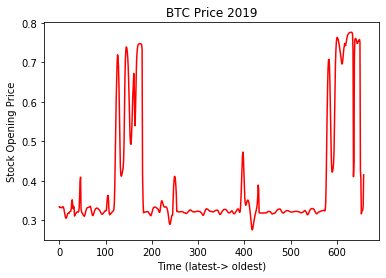

In [26]:
# predicted_value = scaler.inverse_transform(predicted_value)
plt.plot(predicted_value, color= 'red')
plt.title("BTC Price 2019")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()